In [17]:
import math
import re

import graphviz

In [61]:
modules = {}
with open("input.txt", "rt") as f:
    for line in f.read().strip().split("\n"):
        module, outputs = line.split(" -> ")
        outputs = outputs.split(", ")
    
        if module == "broadcaster": 
            type_ = name = "broadcaster"
        else:
            type_, name = re.match("([%&])(\w+)", module).groups()

        modules[name] = {"type": type_, "outputs": outputs}

        for output in outputs:
            if output not in modules:
                modules[output] = {"type": None, "outputs": []}

FLIP_FLOP_TYPE = "%"
CONJUNCTION_TYPE = "&"

# Part 1

In [58]:
states: dict[str, int | dict[str, int]] = {}
for name in modules:
    if modules[name]["type"] == FLIP_FLOP_TYPE:
        states[name] = 0
    elif modules[name]["type"] == CONJUNCTION_TYPE:
        states[name] = {}
for name in modules:
    for output in modules[name]["outputs"]:
        if modules[output]["type"] == CONJUNCTION_TYPE:
            states[output][name] = 0


high_pulses = 0
low_pulses = 0
for _ in range(1000):
    low_pulses += 1

    pulse_queue = [("broadcaster", "button", 0)]
    while pulse_queue:
        name, source, signal = pulse_queue.pop(0)

        if name == "broadcaster":
            new_signal = signal

        elif modules[name]["type"] == FLIP_FLOP_TYPE:
            if signal == 1:
                continue
            states[name] = int(not states[name])
            new_signal = states[name]

        elif modules[name]["type"] == CONJUNCTION_TYPE:
            states[name][source] = signal

            if all(state == 1 for state in states[name].values()):
                new_signal = 0
            else:
                new_signal = 1

        for output in modules[name]["outputs"]:
            pulse_queue.append((output, name, new_signal))

            if new_signal == 0:
                low_pulses += 1
            elif new_signal == 1:
                high_pulses += 1

low_pulses * high_pulses

791120136

# Part 2

```
> pip install graphviz
> pamac install graphviz
```


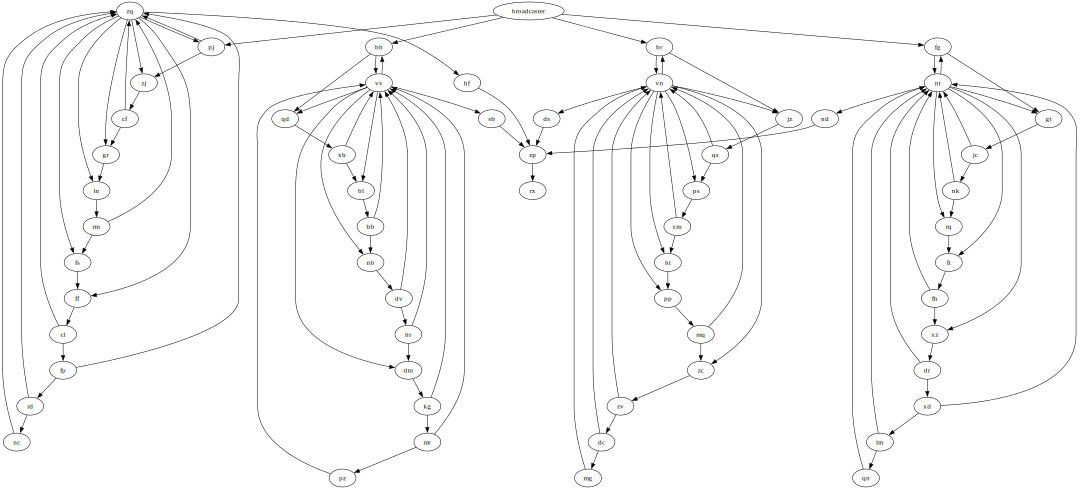

In [60]:
g = graphviz.Digraph()

for module_name in modules:
    g.node(module_name)
    for out in modules[module_name]["outputs"]:
        g.node(out)
        g.edge(module_name, out)

g.graph_attr["size"] = "15"
g

In [63]:
GROUP_OUTPUTS = {"sb", "hf", "ds", "nd"}


states: dict[str, int | dict[str, int]] = {}
for name in modules:
    if modules[name]["type"] == FLIP_FLOP_TYPE:
        states[name] = 0
    elif modules[name]["type"] == CONJUNCTION_TYPE:
        states[name] = {}
for name in modules:
    for output in modules[name]["outputs"]:
        if modules[output]["type"] == CONJUNCTION_TYPE:
            states[output][name] = 0


step = 0
group_outputs_high = {}
while len(group_outputs_high) < 4:
    step += 1

    pulse_queue = [("broadcaster", "button", 0)]
    while pulse_queue:
        name, source, signal = pulse_queue.pop(0)

        if name == "broadcaster":
            new_signal = signal

        elif modules[name]["type"] == FLIP_FLOP_TYPE:
            if signal == 1:
                continue
            states[name] = int(not states[name])
            new_signal = states[name]

        elif modules[name]["type"] == CONJUNCTION_TYPE:
            states[name][source] = signal

            if all(state == 1 for state in states[name].values()):
                new_signal = 0
            else:
                new_signal = 1

        if name in GROUP_OUTPUTS and new_signal == 1:
            group_outputs_high[name] = step

        for output in modules[name]["outputs"]:
            pulse_queue.append((output, name, new_signal))

print(group_outputs_high)
math.lcm(*group_outputs_high.values())

{'ds': 3733, 'sb': 3797, 'hf': 3877, 'nd': 3917}


215252378794009